# Data Exporation

Moving on from cleaning, it's a good idea to get a handle on the type of data we're working with. Just a note, the single difference between the datasets is the SalePrice feature (since we are testing to see how accurate the model is). Also since the training set is about the same size as the testing set, a simple exploration of the testing set will be conducted after the training set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

In [2]:
training = pd.read_csv("../data/cleaned/training.csv", index_col="Id")
testing = pd.read_csv("../data/cleaned/testing.csv", index_col="Id")

In [4]:
training.select_dtypes(exclude="object").info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath     

In [3]:
# Gives us an idea of the numeric aspects of the dataset
training.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,69.684030,10517.363948,6.100069,5.575737,1971.244003,1984.850583,102.539411,443.943797,46.581220,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,22.045335,9984.666267,1.383171,1.113079,30.199555,20.644343,180.575741,456.106417,161.369977,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,68.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,162.500000,712.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let's start by observing some current features which might be beneficial to combine to create new feautres for the model as a list. While creating these features is not the key point of this section, it should be noted that we will be dealing with these later on during feature engineering. Observing what can be used though is apart of this exploration section.

Using numerical features:
<ol>
    <li>OverallQual/OverallCond</li>
    <li>(BsmtFinSF1 + BsmtFinSF2) / BsmtTotalSF</li>
    <li>(BsmtFullBath + BsmtHalfBath) / BsmtTotalSF</li>
    <li>(FullBath + HalfBath) / GrLivArea</li>
    <li>(1stFlrSF + 2ndFlrSF) / TotRmsAvgGrd</li>
</ol>

Using categorical features:
<ol>
    <li>BsmtQual/BsmtCond</li>
    <li>GarageQual/GarageCond</li>
</ol>

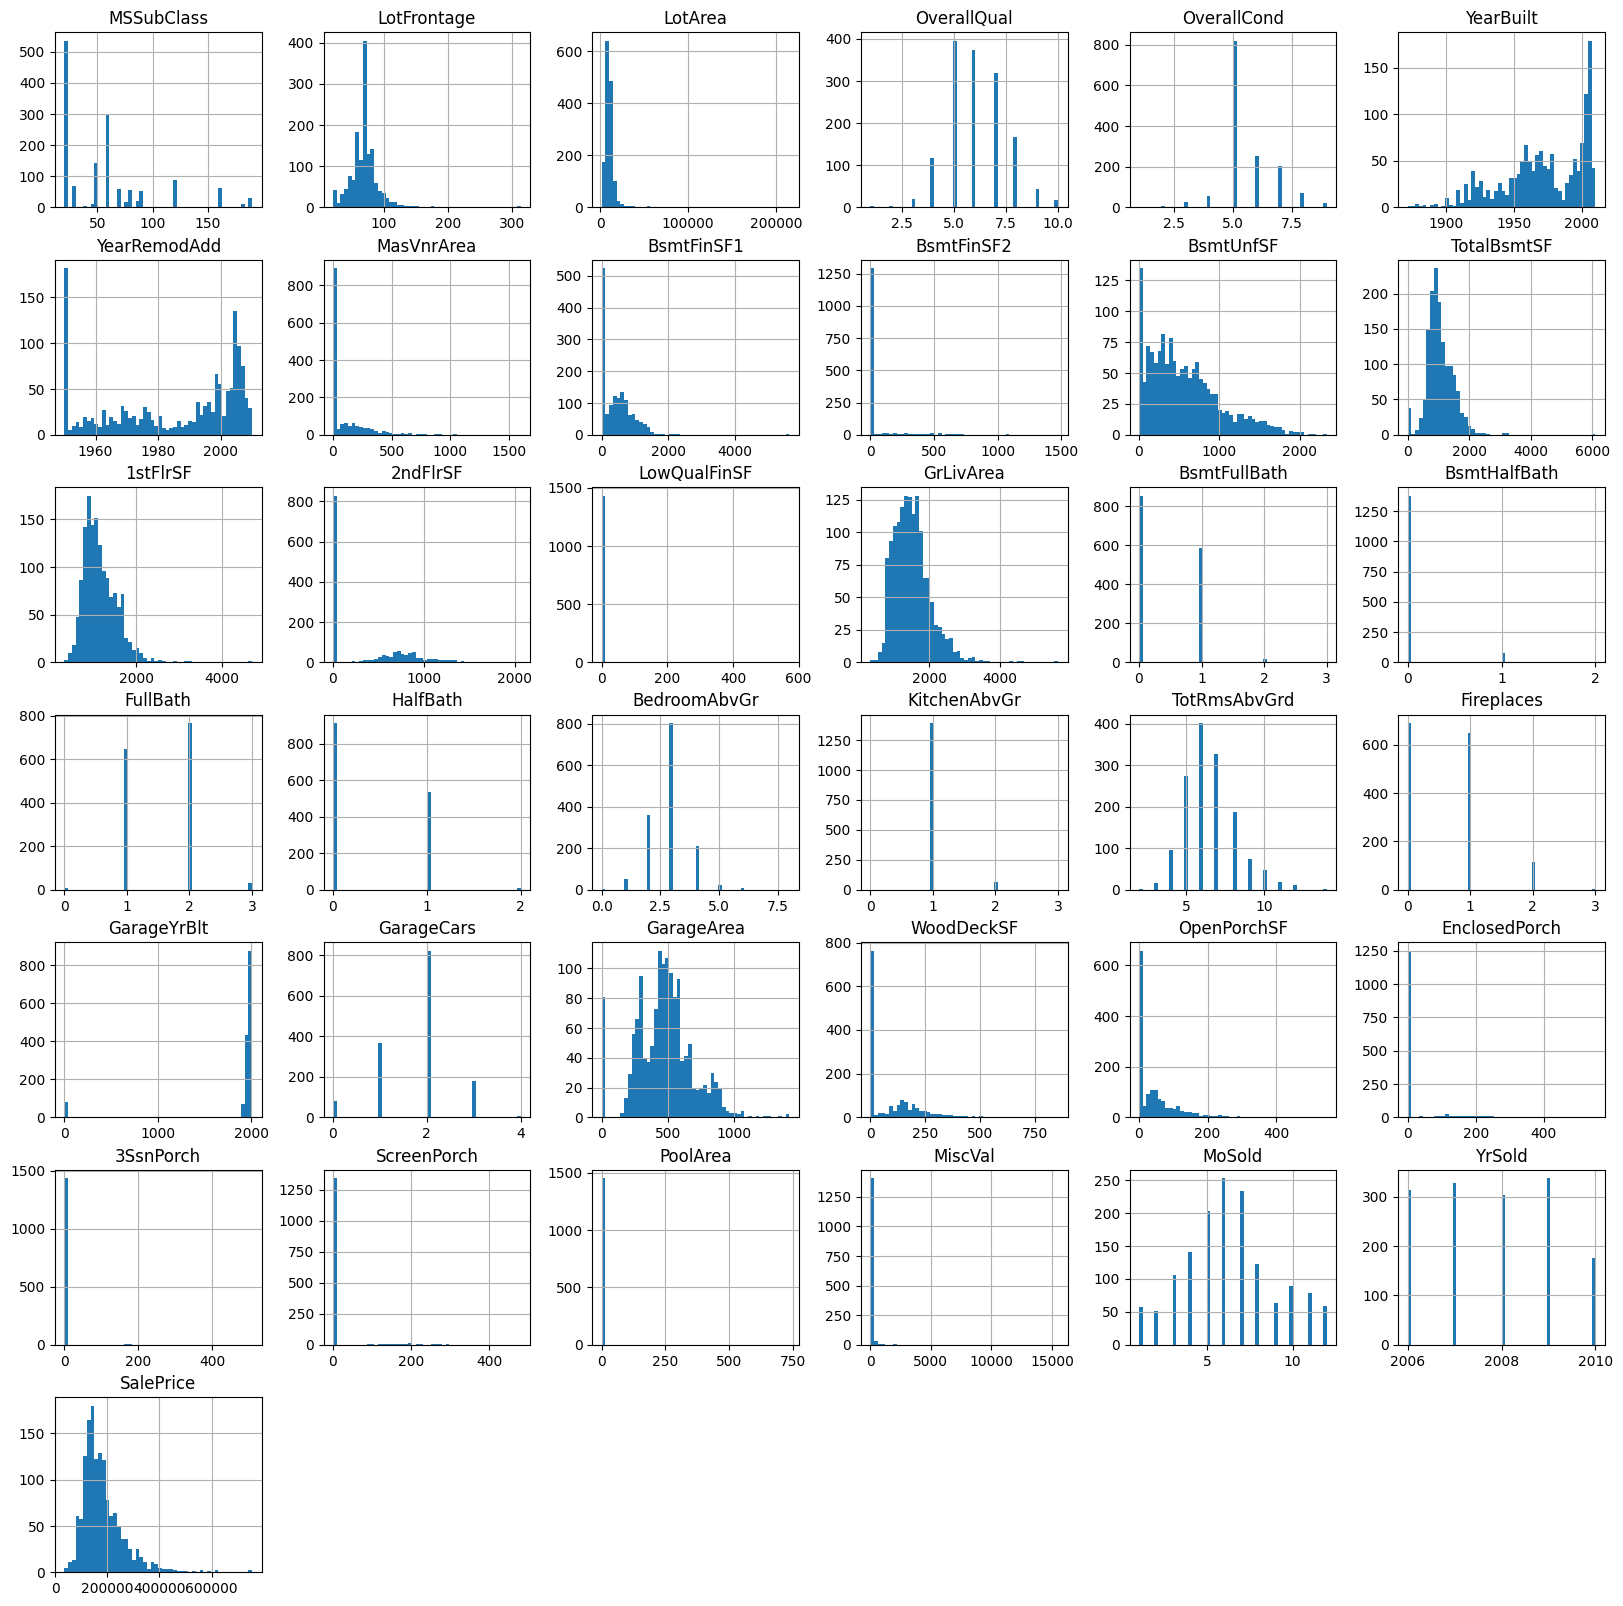

In [4]:
training.hist(bins=50, figsize=(20,20))
plt.show()

In [5]:
def create_heatmap(df:pd.DataFrame):
    ax_ticks = df.select_dtypes(exclude="object").columns
    plt.subplots(figsize=(10,10), layout="constrained")
    plt.imshow(df.corr(method="pearson", numeric_only=True))
    plt.title("Correlation of Numeric Data")
    plt.xticks(ticks=range(len(ax_ticks)), labels=[col for col in ax_ticks], rotation=60, ha="right", va="top")
    plt.yticks(ticks=range(len(ax_ticks)), labels=[col for col in ax_ticks])
    plt.colorbar(shrink=.75)
    plt.show()

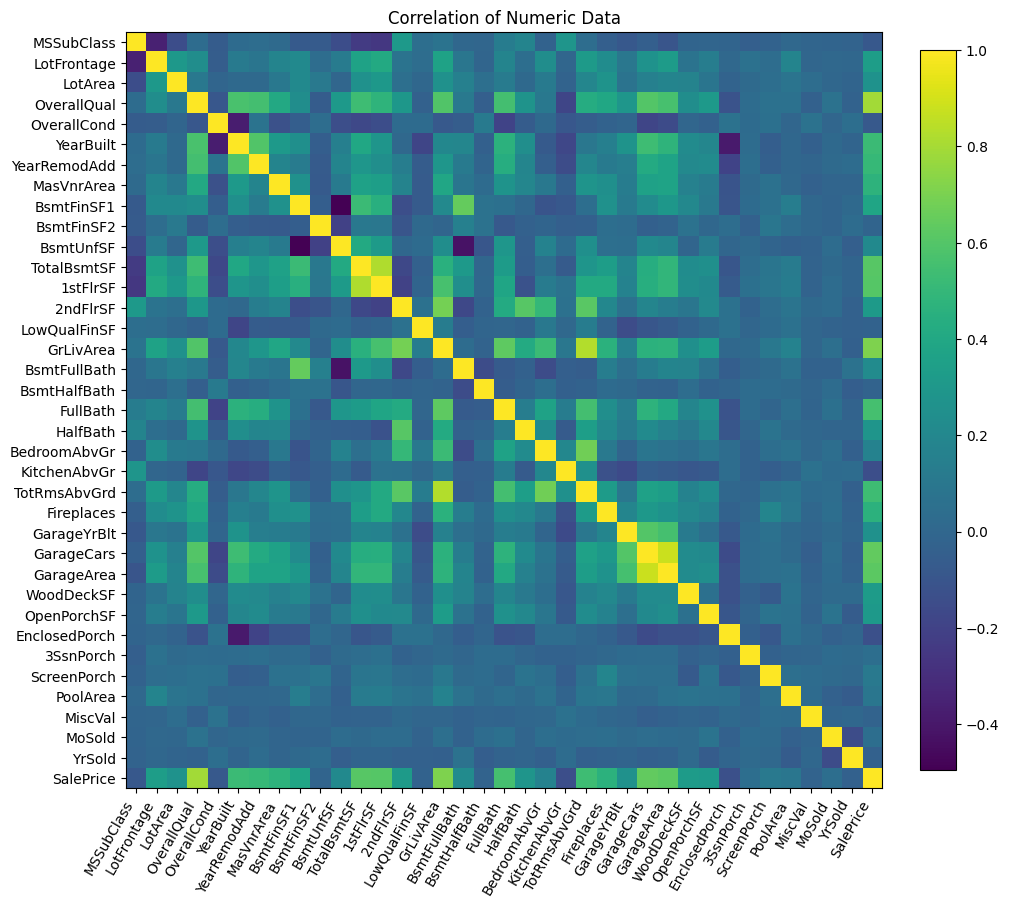

In [6]:
create_heatmap(training)

While the histograms of each individual feature helps us observe the distribution of values, the heat map allows us to understand what type of correlations there might be between these numeric features. While it cannot provide this information for the categorical features, it might be a good idea to create new features using some of the numeric features with a strong correlation. Without going into too much detail about what can be observed, if you take a glance at the SalePrice feature alot of promising information can be revealed simply through this one feature. While there many features which do not show a correlation, there are some obvious ones which would affect the SalePrice feature more than others. Ex. OverallQual, YearBuilt, YearRemodAdd, GrLivArea, FullBath, etc. It would therefore be safe to assume these features (and some others) have the largest affect on the overall SalePrice for the house.

Using the features with the strongest correlations, let's generate a scatter matrix to further understand how these features might affect the SalePrice.

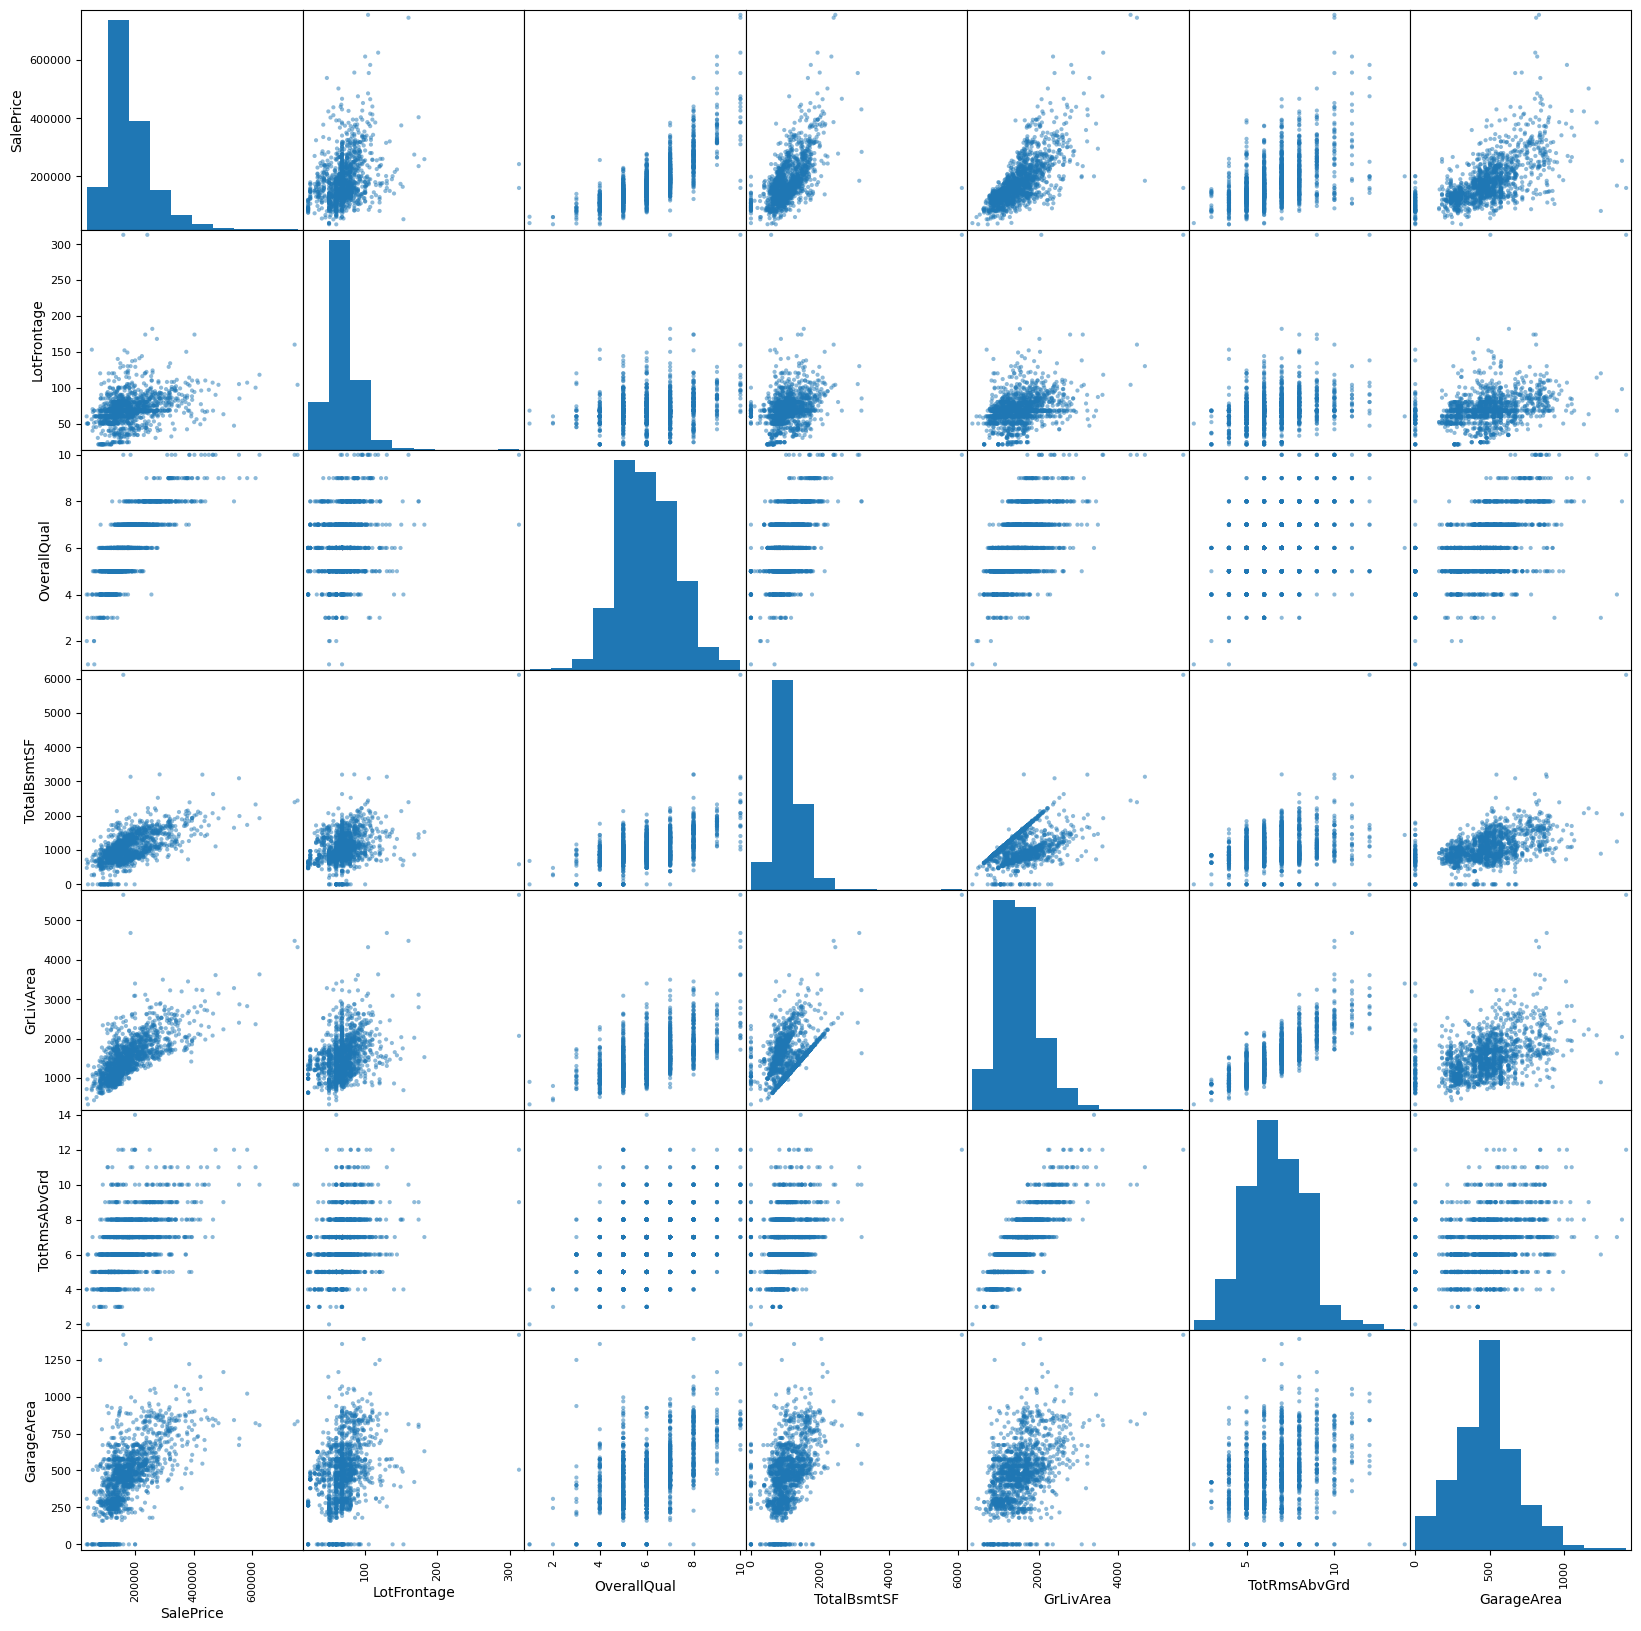

In [7]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "LotFrontage", "OverallQual", "TotalBsmtSF", "GrLivArea", "TotRmsAbvGrd", "GarageArea"]
scatter_matrix(training[attributes] ,figsize=(20,20))
plt.show()

As you would assume, all of these features have a positive correlation to the SalePrice. Using a copy of the training data, let's create some new features using existing ones to see how they might correlate with the SalePrice.

In [8]:
training_copy = training.copy()

training_copy["overall_qual_cond_ratio"] = training_copy["OverallQual"] / training_copy["OverallCond"]
training_copy["bsmt_fin_sf_total_ratio"] = (training_copy["BsmtFinSF1"] + training_copy["BsmtFinSF2"]) / training_copy["TotalBsmtSF"]
training_copy["bsmt_baths_per_sf"] = (training_copy["BsmtFullBath"] + training_copy["BsmtHalfBath"]) / training_copy["TotalBsmtSF"]
training_copy["gr_liv_area_baths_per_sf"] = (training_copy["FullBath"] + training_copy["HalfBath"]) / training_copy["GrLivArea"]
training_copy["tot_rms_per_sf"] = (training_copy["1stFlrSF"] + training_copy["2ndFlrSF"]) / training_copy["TotRmsAbvGrd"]
training_copy["garage_cars_per_sf"] = training_copy["GarageCars"] / training_copy["GarageArea"]

In [9]:
corr_matrix = training_copy.corr(method="pearson", numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice                   1.000000
OverallQual                 0.791069
GrLivArea                   0.708618
GarageCars                  0.640473
overall_qual_cond_ratio     0.626057
GarageArea                  0.623423
TotalBsmtSF                 0.613905
1stFlrSF                    0.605968
FullBath                    0.560881
tot_rms_per_sf              0.546189
TotRmsAbvGrd                0.533779
YearBuilt                   0.523273
YearRemodAdd                0.507430
MasVnrArea                  0.473452
Fireplaces                  0.466968
BsmtFinSF1                  0.386436
LotFrontage                 0.334567
WoodDeckSF                  0.324422
2ndFlrSF                    0.319464
OpenPorchSF                 0.315831
HalfBath                    0.284400
LotArea                     0.263837
GarageYrBlt                 0.261413
BsmtFullBath                0.227082
BsmtUnfSF                   0.214446
BedroomAbvGr                0.168235
ScreenPorch                 0.111419
b

As can be seen, some of the new features that were created are actually more correlated to the SalePrice than the individual features. This does show that in certian cases at least, that combining certian features does create for stronger correlation between those new features and the SalePrice feature. Similarly like was done making the scatter_matrix previously, creating one using the new features created might show some interesting information.

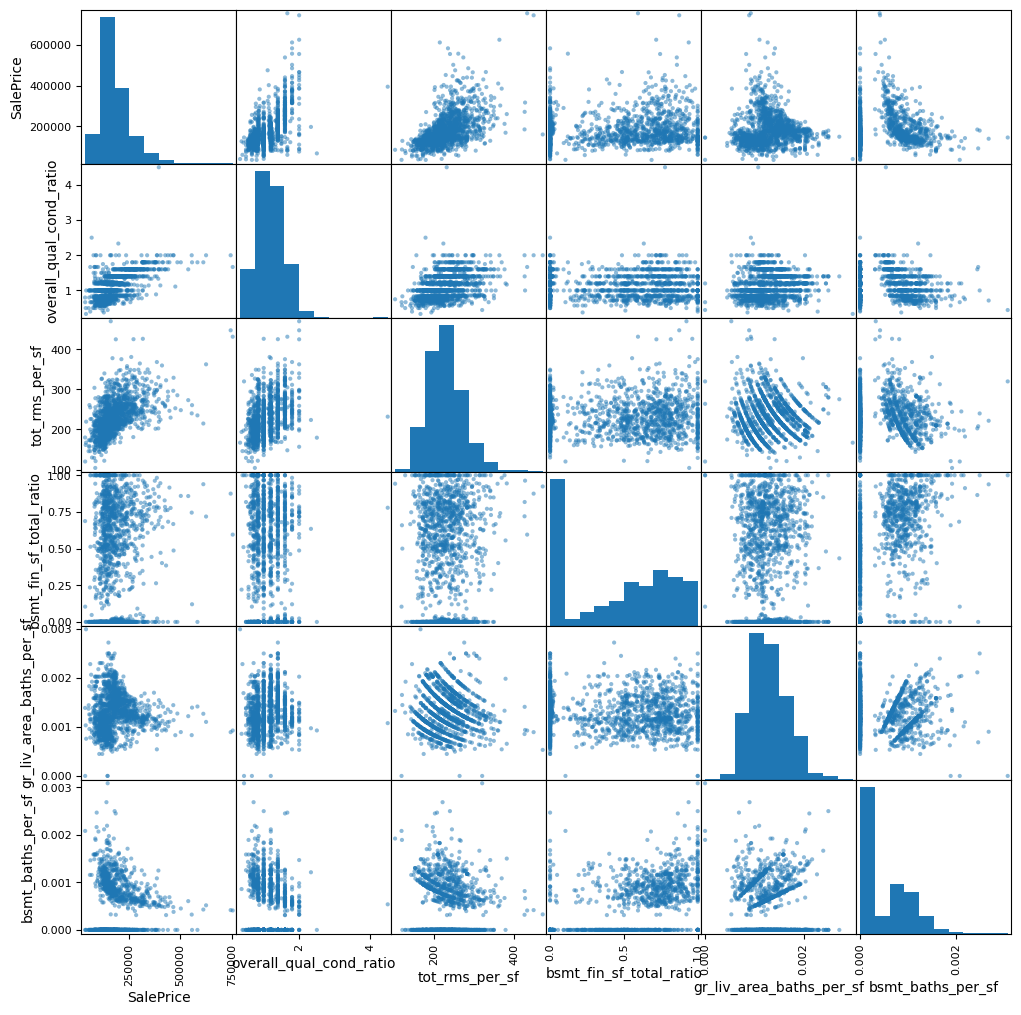

In [10]:
attributes = ["SalePrice", "overall_qual_cond_ratio", "tot_rms_per_sf", "bsmt_fin_sf_total_ratio", "gr_liv_area_baths_per_sf", "bsmt_baths_per_sf"]

scatter_matrix(training_copy[attributes], figsize=(12,12))
plt.show()

Similar to what was seen by observing the correlations just of the SalePrice features, we can notice the negative correlations visually using the scatter_matrix. Using what has been discovered, using these numerical features proves the be the top five most promising when predicting the SalePrice for each house:
<ol>
<li>OverallQual                 0.791069</li>
<li>GrLivArea                   0.708618</li>
<li>GarageCars                  0.640473</li>
<li>overall_qual_cond_ratio     0.626057</li>
<li>GarageArea                  0.623423</li>
</ol>

We know what we're working with now using the training set, but what about the testing set? Let's take a quick galnce at that before moving onto the categorical features within each dataset.

In [11]:
testing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,57.486207,68.316552,9729.542069,6.093793,5.558621,1971.568966,1983.785517,99.958621,440.703448,52.665517,...,472.948966,93.018621,48.279310,23.332414,1.805517,17.170345,0.808276,57.839310,6.117931,2007.771724
std,42.825196,20.219153,4673.045121,1.420846,1.105703,30.295276,21.090333,177.329958,455.718894,177.026484,...,216.873137,127.568411,68.678685,61.821622,20.270006,56.769271,22.163404,632.264195,2.719055,1.303878
min,20.000000,21.000000,1470.000000,2.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7379.250000,5.000000,5.000000,1954.000000,1964.000000,0.000000,0.000000,0.000000,...,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9375.000000,6.000000,5.000000,1974.000000,1992.500000,0.000000,353.000000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11488.750000,7.000000,6.000000,2001.000000,2004.000000,162.000000,755.000000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,195.000000,51974.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,584.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


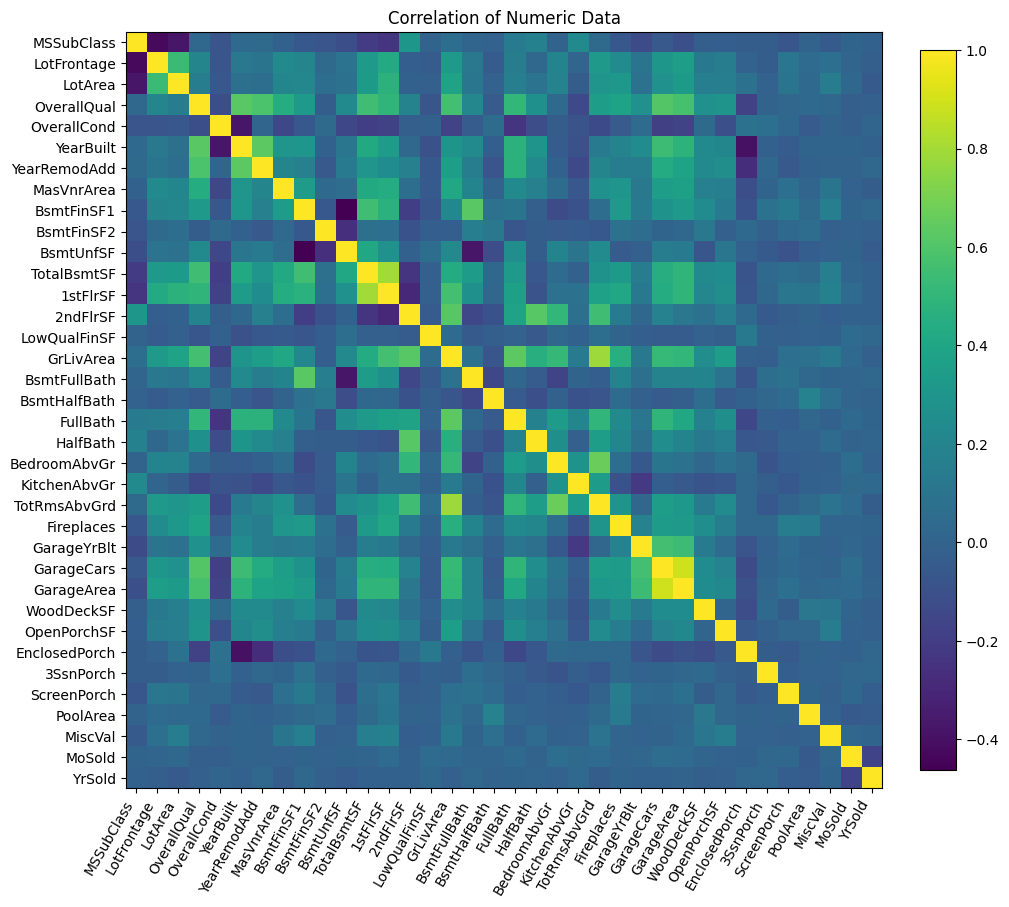

In [12]:
create_heatmap(testing)

While this does show similar findings to the training set, let's take a look at the difference of each features correlation using numerics. It should be noted as well that one of the reasons why the testing set might look slightly different in it's correlations strengths is because it is lacking the SalePrice feautre.

In [19]:
diff_map = abs(training.corr("pearson", numeric_only=True) - testing.corr("pearson", numeric_only=True))
diff_map.max().sort_values(ascending=False)

LotArea          0.235940
MSSubClass       0.235940
LotFrontage      0.230877
MiscVal          0.203215
1stFlrSF         0.203215
TotalBsmtSF      0.183999
OpenPorchSF      0.170882
BsmtHalfBath     0.167431
PoolArea         0.167431
BsmtFinSF1       0.162593
GarageArea       0.153552
MasVnrArea       0.136097
GrLivArea        0.130588
GarageCars       0.122832
LowQualFinSF     0.122679
GarageYrBlt      0.122679
WoodDeckSF       0.119383
BsmtFullBath     0.113852
TotRmsAbvGrd     0.111687
BsmtFinSF2       0.109533
2ndFlrSF         0.107586
OverallQual      0.102858
EnclosedPorch    0.101589
Fireplaces       0.096533
BsmtUnfSF        0.096533
3SsnPorch        0.095235
YearBuilt        0.095056
HalfBath         0.090958
MoSold           0.089691
FullBath         0.089065
BedroomAbvGr     0.089061
KitchenAbvGr     0.089061
OverallCond      0.080370
YearRemodAdd     0.074998
ScreenPorch      0.074134
YrSold           0.055689
SalePrice             NaN
dtype: float64

Maybe this wasn't expected, but there is a slight but noticable difference in correlation between the two sets when inspecting the difference in the correlation values for each feature. Does using the same engineered features have the same outcome too?

In [14]:
testing_copy = testing.copy()

testing_copy["overall_qual_cond_ratio"] = testing_copy["OverallQual"] / testing_copy["OverallCond"]
testing_copy["bsmt_fin_sf_total_ratio"] = (testing_copy["BsmtFinSF1"] + testing_copy["BsmtFinSF2"]) / testing_copy["TotalBsmtSF"]
testing_copy["bsmt_baths_per_sf"] = (testing_copy["BsmtFullBath"] + testing_copy["BsmtHalfBath"]) / testing_copy["TotalBsmtSF"]
testing_copy["gr_liv_area_baths_per_sf"] = (testing_copy["FullBath"] + testing_copy["HalfBath"]) / testing_copy["GrLivArea"]
testing_copy["tot_rms_per_sf"] = (testing_copy["1stFlrSF"] + testing_copy["2ndFlrSF"]) / testing_copy["TotRmsAbvGrd"]
testing_copy["garage_cars_per_sf"] = testing_copy["GarageCars"] / testing_copy["GarageArea"]

In [20]:
copy_diff_map = abs(training_copy.corr(method="pearson", numeric_only=True) - testing_copy.corr(method="pearson", numeric_only=True))
copy_diff_map.max().sort_values(ascending=False)

MSSubClass                  0.235940
LotArea                     0.235940
LotFrontage                 0.230877
MiscVal                     0.203215
1stFlrSF                    0.203215
TotalBsmtSF                 0.183999
OpenPorchSF                 0.170882
PoolArea                    0.167431
BsmtHalfBath                0.167431
BsmtFinSF1                  0.162593
GarageArea                  0.153552
MasVnrArea                  0.136097
GrLivArea                   0.130588
GarageCars                  0.122832
LowQualFinSF                0.122679
GarageYrBlt                 0.122679
WoodDeckSF                  0.119383
BsmtFullBath                0.113852
overall_qual_cond_ratio     0.111908
TotRmsAbvGrd                0.111687
BsmtFinSF2                  0.109533
2ndFlrSF                    0.107586
Fireplaces                  0.106054
bsmt_fin_sf_total_ratio     0.106054
OverallQual                 0.102858
EnclosedPorch               0.101589
BsmtUnfSF                   0.096533
3

In [21]:
res = abs(diff_map - copy_diff_map).max()
res.sort_values(ascending=False)

1stFlrSF                    0.0
2ndFlrSF                    0.0
LowQualFinSF                0.0
MSSubClass                  0.0
MasVnrArea                  0.0
MiscVal                     0.0
MoSold                      0.0
OpenPorchSF                 0.0
OverallCond                 0.0
OverallQual                 0.0
PoolArea                    0.0
ScreenPorch                 0.0
TotRmsAbvGrd                0.0
TotalBsmtSF                 0.0
WoodDeckSF                  0.0
YearBuilt                   0.0
YearRemodAdd                0.0
LotFrontage                 0.0
LotArea                     0.0
KitchenAbvGr                0.0
BsmtUnfSF                   0.0
3SsnPorch                   0.0
BedroomAbvGr                0.0
BsmtFinSF1                  0.0
BsmtFinSF2                  0.0
BsmtFullBath                0.0
BsmtHalfBath                0.0
EnclosedPorch               0.0
HalfBath                    0.0
Fireplaces                  0.0
FullBath                    0.0
GarageAr

### What's next

Well the exploration of the numerical features has been complete on both training and testing sets. As mentioned previously, we will be working on feature engineering later on as well so the current datasets have not changed.